<a href="https://colab.research.google.com/github/BhavishBerry/NLP-INTRO/blob/main/NLP_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to NLP fundamentals in TensorFlow**

NLP has a goal of deriving information of natural language(could be sequences text or speech).

Another common term for NLP problems is sequence to sequence problems(seq2seq).




Welcome to this beginner-friendly notebook on **Natural Language Processing (NLP)** using deep learning. Here, we explore how machines can understand and classify human language — specifically, we'll work on **binary text classification** using the famous Kaggle dataset:

> 🔗 **Dataset**: [Real or Not? NLP with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started)

---

 📌 Objective

We aim to build a machine learning model that can determine **whether a given tweet is about a real disaster or not**. This is a **binary classification** problem:
- **1 → Disaster tweet**
- **0 → Not a disaster**

---

 📦 Dataset Overview

The dataset consists of two CSV files:

- `train.csv`: Contains ~7,600 tweets with labels (`target` column).
- `test.csv`: Used for submitting predictions on Kaggle.

 ✍️ Columns:
- `id`: unique identifier
- `text`: the tweet content
- `location`: optional location info
- `keyword`: optional keyword flag
- `target`: binary label (1 for disaster, 0 for not)

---

🔧 What You'll Learn

This notebook covers fundamental NLP steps:
- **Text Preprocessing**: cleaning, tokenizing, and padding text.
- **Vectorization**: converting words into numerical form.
- **Model Building**: using RNN (LSTM) or other deep learning models.
- **Evaluation**: accuracy, loss, confusion matrix.

---

🛠️ Tools & Libraries

- `TensorFlow/Keras`: for model creation and training
- `Pandas/Numpy`: data handling
- `Sklearn`: metrics and preprocessing
- `Matplotlib/Seaborn`: data visualization

---

 ⚙️ Flow of the Notebook

1. Load and explore the dataset
2. Preprocess the tweet texts
3. Tokenize and pad the sequences
4. Build a deep learning model (LSTM or GRU)
5. Train and validate
6. Evaluate model on test set
7. (Optional) Submit to Kaggle

---

Let’s get started with loading and exploring the dataset 👇


In [1]:
import tensorflow as tf

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-06-11 12:02:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-06-11 12:02:20 (8.85 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys

## Get text datasets

The datsets we are going to be using is Kaggles introdcution on NLP datasets for binary classification to see if a tweet is about a disaster or not

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2025-06-11 12:02:20--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   975KB/s    in 0.6s    

2025-06-11 12:02:22 (975 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Becoming one with the data

In [5]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
train_df.text.value_counts()

,count
text,
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,5
...,...
Fotoset: elanorofrohan: 10th December 2013 Green Carpet in Zurich for the Swiss Premiere of The Desolation... http://t.co/BQ3P7n7w06,1
Beautiful desolation. Just me a couple of coyotes some lizards and the morning sun. #Phoenix #Arizona http://t.co/K2tBES65oa,1
The Hobbit: The Desolation of Smaug - Ed Sheeran 'I See Fire' [HD] http://t.co/OXRwRJZmnu,1


In [8]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+10].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
'Tube strike live: Latest travel updates as London engulfed in chaos' &lt;- genuine baffling Telegraph headline

---

Target: 0 (not real disaster)
Text:
Attention all RCHS football players there will be coffins and body bags by the locker rooms grab one tommorow because were gonna die

---

Target: 1 (real disaster)
Text:
Senator 'alarmed' by reports U.S. military families harassed: A U.S. Senator said on Wednesday he was alarmed byÛ_ http://t.co/sbILA2Yqjq

---

Target: 0 (not real disaster)
Text:
A friend is like blood they are not beside us always. But they come out when we are wounded.

---

Target: 0 (not real disaster)
Text:
Motors Hot Deals #452 &gt;&gt; http://t.co/ED32PBviO7 10x 27W 12V 24V LED Work Light FLOOD Lamp Tractor Truck SUV UTV AÛ_ http://t.co/IfM6v6480P

---

Target: 1 (real disaster)
Text:
I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM

---

Target: 0 (not real disaster)
Text:
Also 

## Splitting the dataset in Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                 train_df_shuffled["target"].to_numpy(),
                                                 test_size=0.1,
                                                 random_state=42)

In [10]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [11]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Preprocessing data

Converting text into numbers:

when dealing with a text problem, one of the first things youll have to do before you can build model is to your text into numbers

There are a few ways to do this , namely:

* Tokenisation: direct mapping of token
(a token could be a word or a character) to a number

* Embedding: create a matrix of feature vector for each token(the size of feature vector can be defined and this can be learned)(more favourable)

### Step 1: Tokenization

Before feeding text into a neural network, we must convert it from words to numbers. This process is called tokenization.

Each unique word is assigned a unique integer ID. This allows us to represent an entire sentence or tweet as a sequence of numbers.

Example:  
Input text:  
"There is fire in the building"

Tokenized:  
[15, 8, 22, 5, 2, 73]

These numbers don't carry any meaning by themselves — they just represent which word is where. In the next step, we’ll convert them into meaningful vector representations using embeddings.


In [12]:
from tensorflow.keras.layers import TextVectorization

# General intro to text vectorisation params
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=None,
)

In [13]:
# find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [14]:
# Setup text vectorization vectorisation
max_vocab_length = 10000 # max number of words in our vocabulary
max_length = 15 # max lenght our sequences will be(eg how many words from a tweet does a model see)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [15]:
# Fit the text vectorisor to the training text
text_vectorizer.adapt(train_sentences)# adaps our data according to text vectorisor

 Create a sample sentence and tokenize it

In [16]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [17]:
# Choose a random sentence from the training dataset and tokenise it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Udhampur terror attack: Militants attack police post 2 SPOs injured: Suspected militants tonight attacked a p... http://t.co/cEKbxJmPBj

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1163, 1057,  113, 1072,  113,   77,  371,   70, 1471,  243, 1355,
        1072,  383,  323,    3]])>

In [18]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens(words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
Bottom 5 least common words: [np.str_('pages'), np.str_('paeds'), np.str_('pads'), np.str_('padres'), np.str_('paddytomlinson1')]


### Step 2: Embedding Layer

Once we have tokenized the text into sequences of numbers (word IDs), we use an Embedding Layer to give each word a dense vector that carries semantic meaning.

This is where our model starts to "understand" relationships between words like:
- "fire" and "smoke" being related,
- "fire" and "sale" being unrelated in the disaster context.

The embedding layer transforms each word ID into a vector of real numbers, for example, in 50 or 100 dimensions.

What the Embedding Layer does:

"fire" (ID: 22) → [0.15, -0.09, 0.72, ..., 0.01]  
"building" (ID: 73) → [0.41, 0.02, -0.33, ..., -0.17]

In TensorFlow/Keras, the embedding layer can be defined like this:
```python
Embedding(input_dim=10000, output_dim=100, input_length=50)


In [19]:
from tensorflow.keras import layers

embedding = layers.Embedding(
                            input_dim=max_vocab_length,   # Number of unique words in the vocabulary (vocab size)
                            output_dim=128,               # Dimension of the embedding vector for each word
                            input_length=max_length       # Length of input sequences (number of tokens per sample)
                            )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
# get a random sentence fromm training sets
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embedded = embedding(text_vectorizer([random_sentence]))
sample_embedded

Original text:
She screamed when she got the microchip needle. Tbh I would have cried too the needle was massive ya haram

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04985524, -0.00868328, -0.01452471, ...,  0.04533478,
          0.03812918, -0.01408081],
        [-0.04822922,  0.01629612, -0.01115955, ...,  0.00980449,
         -0.02463162, -0.03004597],
        [ 0.03254488, -0.02487053, -0.03327148, ...,  0.021168  ,
         -0.04315393,  0.00143304],
        ...,
        [-0.02864217,  0.0328786 ,  0.00058861, ...,  0.01075917,
          0.01478438,  0.02944485],
        [ 0.03817183,  0.00600906, -0.00141682, ...,  0.0234626 ,
         -0.00709462,  0.03350539],
        [ 0.04938457,  0.04065461,  0.01774213, ...,  0.02577639,
          0.01143111, -0.03917358]]], dtype=float32)>

## **Creating our models**

### Model 0: Getting a Baseline

As with all machine learning experiments, it's important to first build a **baseline model**. A baseline model helps us understand what performance we can achieve with simple methods, and acts as a benchmark for future, more complex models.

In this case, we'll use **Scikit-learn’s Multinomial Naive Bayes** model as our baseline. It’s fast, simple, and surprisingly effective for text classification tasks.

To convert our text data into a numerical format, we'll use the **TF-IDF (Term Frequency - Inverse Document Frequency)** method. This method transforms words into numbers based on:
- How often a word appears in a document (tweet)
- How unique or common that word is across all tweets

TF-IDF helps reduce the weight of common words like "the", "is", and boost the importance of rarer, more meaningful words like "earthquake", "fire", or "explosion".

### Why use a non-deep learning model as a baseline?

It’s common practice to first try a traditional machine learning algorithm like Naive Bayes before jumping into deep learning because:
- It’s faster to train and tune
- It gives you a quick idea of how "learnable" the problem is
- It helps you measure how much better your deep learning models actually are

Let’s now build Model 0 using Naive Bayes + TF-IDF.


In [21]:
from operator import mod
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data

model_0.fit(train_sentences, train_labels)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [22]:
# evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [23]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

**Creating a helper function to Evaluate Our baseline model**

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def calculate_results(y_true, y_pred):
  """
  Args:True lables, Predicted labels

  Reutrns: Calculates model accuracy, precision, recall
  and f1 score of a binary classification model.
  """
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision = precision_score(y_true, y_pred)
  model_recall = recall_score(y_true, y_pred)
  model_f1 = f1_score(y_true, y_pred)
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [25]:
# lets test our helper functions
baseline_results = calculate_results(y_true=val_labels,
                                      y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model-1: A simple Dense Model

In [26]:
# Build model with Functional API
from tensorflow.keras import layers

# Input layer expecting raw text (string format)
inputs = layers.Input(shape=(1,), dtype=tf.string)

# Convert text to integer tokens using TextVectorization
vectorizer_layer = text_vectorizer(inputs)

# Map tokens to dense embedding vectors
embedding_layer = embedding(vectorizer_layer)

# Reduce embedding output to a single vector per tweet
globalpooling_layer = layers.GlobalAveragePooling1D()(embedding_layer)

# Final output layer with sigmoid for binary classification
dense_layer = layers.Dense(1, activation="sigmoid")(globalpooling_layer)

# Define the full model
model_1 = tf.keras.Model(inputs, dense_layer, name="model_1_dense")

model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_1_history = model_1.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    validation_steps=int(0.25 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6339 - loss: 0.6471 - val_accuracy: 0.7638 - val_loss: 0.5348
Epoch 2/5
 16/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8303 - loss: 0.4584

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8219 - loss: 0.4584 - val_accuracy: 0.7808 - val_loss: 0.4742
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8573 - loss: 0.3622 - val_accuracy: 0.7913 - val_loss: 0.4577
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8900 - loss: 0.2943 - val_accuracy: 0.7887 - val_loss: 0.4706
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9085 - loss: 0.2419 - val_accuracy: 0.7822 - val_loss: 0.4769


In [28]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5075


[0.47690072655677795, 0.7821522355079651]

In [29]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape, model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


((762, 1),
 array([[0.46038598],
        [0.7363982 ],
        [0.99813384],
        [0.12647547],
        [0.1104212 ],
        [0.9422273 ],
        [0.919102  ],
        [0.99293125],
        [0.9721916 ],
        [0.2782914 ]], dtype=float32))

In [30]:
 # convert model predictions to label format

 model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

 model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [31]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 0.7821522309711286,
 'precision': 0.7973856209150327,
 'recall': 0.7011494252873564,
 'f1': 0.746177370030581}

In [32]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

 Looks like our baseline model is outperforming our first deep-learning model

##**Visualizing learned embeddings**

In [33]:
# Get the vocabulary from text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [34]:
# Get the wieght matrix of emebedding layer
#(these are the numerical representations of each token in our training data)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

### Visualising word embeddings using projector in TensorFlow

Once our model has learned embeddings for words, we can **visualize** them to understand relationships between different words. TensorFlow provides a tool called the **Embedding Projector**, which lets you explore these word vectors in 2D or 3D space.

To use it:
- Extract the embedding weights after training
- Map each index to its corresponding word
- Save the data in a specific format (TSV files)
- Upload them to TensorFlow's [projector tool](https://projector.tensorflow.org/)

This can reveal clusters like:
- Similar words grouped together (e.g., "fire", "smoke", "flames")
- Separation between unrelated words

It's a great way to see if your model is "understanding" word meaning!


In [35]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:

    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [36]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This code will generate two files — `vectors.tsv` and `metadata.tsv` — that contain the learned word embeddings and their corresponding words.

- `vectors.tsv` holds the embedding vectors for each word.
- `metadata.tsv` holds the actual words (one per line) to label the vectors.

After running the cell, these files will automatically be downloaded.  
You can then upload them to the [TensorFlow Embedding Projector](https://projector.tensorflow.org/) to explore your embeddings in 2D or 3D.

This helps visualize how your model understands word relationships.

## Recurrent Neural Networks (RNNs)

RNNs are a type of neural network designed to work with **sequence data**, where the **order of inputs matters** — such as text, time series, or speech.

The key idea behind RNNs is that they have a **memory** of previous inputs. Unlike traditional neural networks, RNNs pass information from one step of the sequence to the next, allowing the model to learn patterns over time.

This makes them ideal for tasks like:
- Text classification
- Language modeling
- Machine translation
- Sentiment analysis



### Model 2: LSTM

**LSTM** - long short term memory

Structure of an RNN:

```
Input(Text) -> Tokenize -> Embedding - Layers(RNNs[LSTMs,GRU,etc]/Dense) ->  Output(label propability)
```

In [37]:
# Create an LSTM model
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype=tf.string)

vectorizer_layer_2 = text_vectorizer(inputs)

embedding_layer_2 = embedding(vectorizer_layer_2)

#lstm_layer = layers.LSTM(64, return_sequences=True)(embedding_layer_2)
#IMPORTANT-NOTE:When you are stacking RNN cells together, you need to set return_sequences to True

lstm_layer2 = layers.LSTM(64)(embedding_layer_2)

#dense_layer1 = layers.Dense(64, activation="relu")(lstm_layer2)

outputs_2 = layers.Dense(1, activation="sigmoid")(lstm_layer2)

model_2 = tf.keras.Model(inputs, outputs_2, name="model_2_LSTM")

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# fit the model
model_2_history = model_2.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    validation_steps=int(0.25 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9056 - loss: 0.2886 - val_accuracy: 0.7795 - val_loss: 0.6288
Epoch 2/5
  9/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9425 - loss: 0.1495

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9419 - loss: 0.1565 - val_accuracy: 0.7861 - val_loss: 0.6679
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9552 - loss: 0.1276 - val_accuracy: 0.7835 - val_loss: 0.6806
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9567 - loss: 0.1048 - val_accuracy: 0.7835 - val_loss: 0.7568
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9700 - loss: 0.0795 - val_accuracy: 0.7717 - val_loss: 0.9015


In [39]:
# evaluate our model
model_2.evaluate(val_sentences, val_labels)
# use the helper function for further evaluation
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7540 - loss: 0.9916
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


((762, 1),
 array([[6.01959135e-03],
        [7.92738140e-01],
        [9.99671757e-01],
        [1.09617725e-01],
        [7.45549507e-04],
        [9.98024225e-01],
        [9.36652899e-01],
        [9.99788761e-01],
        [9.99665141e-01],
        [6.78161979e-01]], dtype=float32))

In [40]:
# Covert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 0.7716535433070866,
 'precision': 0.7701863354037267,
 'recall': 0.7126436781609196,
 'f1': 0.7402985074626866}

In [41]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 3: GRU
Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [42]:
# Build an RNN using the GRU cell

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")

text_vectorizer_layer = text_vectorizer(inputs)

embedding_layer = embedding(text_vectorizer_layer)

GRU_layer = layers.GRU(64, return_sequences=True)(embedding_layer) # if we need to further stack more recurrent layers

LSTM_layer = layers.LSTM(64,return_sequences=True)(GRU_layer)

GRU2_layer = layers.GRU(64)(LSTM_layer)

outputs = layers.Dense(1, activation="sigmoid")(GRU2_layer)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")
model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 15, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,375,297 (5.25 MB)

 Trainable params: 1,375,297 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# fit the model
model_3_history = model_3.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    validation_steps=int(0.15 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9276 - loss: 0.2077 - val_accuracy: 0.7651 - val_loss: 0.8571
Epoch 2/5
  3/215 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9896 - loss: 0.0313 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9724 - loss: 0.0731 - val_accuracy: 0.7677 - val_loss: 1.2086
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9741 - loss: 0.0618 - val_accuracy: 0.7572 - val_loss: 1.3163
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9733 - loss: 0.0616 - val_accuracy: 0.7690 - val_loss: 1.2822
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9799 - loss: 0.0458 - val_accuracy: 0.7677 - val_loss: 1.4615


In [44]:
# evaluate our model
model_3.evaluate(val_sentences, val_labels)
# predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]
# inputting values to determine accuracy,f1 score etc
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=tf.squeeze(tf.round(model_3_pred_probs)))
model_3_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7465 - loss: 1.5725
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


{'accuracy': 0.7677165354330708,
 'precision': 0.7614678899082569,
 'recall': 0.7155172413793104,
 'f1': 0.7377777777777778}

### Model-4: Bi-Directional Layer

This model uses a **Bidirectional LSTM**, which reads the text **both forward and backward**. It captures context from **both directions**, improving understanding of the full sentence for better classification.


In [45]:
# Build RNN using Bi-Directional layer

inputs = layers.Input(shape=(1,), dtype="string")

text_vectorizer_layer = text_vectorizer(inputs)

embedding_layer = embedding(text_vectorizer_layer)

forward_layer = layers.LSTM(64)

backward_layer = layers.LSTM(64, go_backwards=True)

bi_directional_layer = layers.Bidirectional(forward_layer,backward_layer=backward_layer)(embedding_layer)

output_layer = layers.Dense(1, activation="sigmoid")(bi_directional_layer)

model_4 = tf.keras.Model(inputs, output_layer, name="model_4_Bidirectional")

# Compile the model

model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_4.summary()

Model: "model_4_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# fit the model
model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    validation_steps=int(0.15 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9422 - loss: 0.2003 - val_accuracy: 0.7703 - val_loss: 1.0275
Epoch 2/5
  8/215 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9870 - loss: 0.0518

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9776 - loss: 0.0543 - val_accuracy: 0.7664 - val_loss: 1.1081
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9780 - loss: 0.0480 - val_accuracy: 0.7625 - val_loss: 1.3301
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9778 - loss: 0.0444 - val_accuracy: 0.7717 - val_loss: 1.2238
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9764 - loss: 0.0468 - val_accuracy: 0.7690 - val_loss: 1.4591


In [47]:
# Evaluate our model
model_4.evaluate(val_sentences, val_labels)

# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)

# Calculate results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=tf.squeeze(tf.round(model_4_pred_probs)))
model_4_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7506 - loss: 1.6105
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


{'accuracy': 0.7690288713910761,
 'precision': 0.8049645390070922,
 'recall': 0.6522988505747126,
 'f1': 0.7206349206349206}

### Model-5: Convolutional 1D Layer

This model uses a **1D Convolutional layer (Conv1D)** to scan over sequences and detect local patterns, like key phrases. It’s fast, efficient, and works well for short texts where specific n-gram features are important for classification.


In [48]:
# Build the model using Conv1D layer
inputs = layers.Input(shape=(1,),dtype="string")

text_vectorizer_layer = text_vectorizer(inputs)

embedding_layer = embedding(text_vectorizer_layer)

conv1d_layer = layers.Conv1D(64,3,activation="relu")(embedding_layer)

globalpooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer)

output_layer = layers.Dense(1, activation="sigmoid")(globalpooling_layer)

model_5 = tf.keras.Model(inputs, output_layer, name="model_5_Conv1D")

# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_5.summary()

Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 13, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,304,705 (4.98 MB)

 Trainable params: 1,304,705 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

We use global average pooling layer due to the "3-dimensionality" of Conv1D layer

In [49]:
# fit the model
model_5.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    validation_steps=int(0.15 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9520 - loss: 0.2716 - val_accuracy: 0.7756 - val_loss: 0.7847
Epoch 2/5
 13/215 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9778 - loss: 0.0759

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9712 - loss: 0.0812 - val_accuracy: 0.7533 - val_loss: 0.9366
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9768 - loss: 0.0624 - val_accuracy: 0.7638 - val_loss: 1.0701
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9780 - loss: 0.0573 - val_accuracy: 0.7585 - val_loss: 1.1836
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9755 - loss: 0.0526 - val_accuracy: 0.7598 - val_loss: 1.2561


In [50]:
# Evaluate our model
model_5.evaluate(val_sentences, val_labels)

# Make predictions
model_5_pred_probs = model_4.predict(val_sentences)

# Calculate results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=tf.squeeze(tf.round(model_4_pred_probs)))
model_5_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7325 - loss: 1.4028
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


{'accuracy': 0.7690288713910761,
 'precision': 0.8049645390070922,
 'recall': 0.6522988505747126,
 'f1': 0.7206349206349206}

## Using Transfer Learning

In this model, we use **Transfer Learning** with the **Universal Sentence Encoder (USE)** as a feature extractor. USE provides rich, pre-trained sentence embeddings that capture the meaning of entire sentences. This allows our model to perform well even with limited training data, by building on knowledge learned from large-scale language data.


### Model-6: Universal Sentence Encoder (USE) as a feature extractor.

In [51]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pretrained USE
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string,
                       trainable=False)

# Define a custom Keras layer to wrap the hub.KerasLayer
class USELayer(tf.keras.layers.Layer):
    def __init__(self, hub_layer):
        super(USELayer, self).__init__()
        self.hub_layer = hub_layer

    def call(self, inputs, training=None):
        return self.hub_layer(inputs)

# Use Functional API with the custom layer
inputs = tf.keras.Input(shape=(), dtype=tf.string)
x = USELayer(embed)(inputs)  # Wrap the hub.KerasLayer
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model_6 = tf.keras.Model(inputs, outputs)

model_6.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_layer (USELayer)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,585 (514.00 KB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 0 (0.00 B)

Due to unexpected issues the params of our custome layers are not visible, however they are properly imported we can ignore the "0" parameters shown above for use_layer

In [52]:
# compile the model

model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
model_6.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    validation_steps=int(0.15 * len(val_sentences)),
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7519 - loss: 0.5421 - val_accuracy: 0.8045 - val_loss: 0.4441
Epoch 2/5
 11/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8168 - loss: 0.4059

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8225 - loss: 0.3968 - val_accuracy: 0.8018 - val_loss: 0.4412
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8303 - loss: 0.3978 - val_accuracy: 0.8123 - val_loss: 0.4392
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8370 - loss: 0.3746 - val_accuracy: 0.8136 - val_loss: 0.4256
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8448 - loss: 0.3594 - val_accuracy: 0.8150 - val_loss: 0.4214


In [53]:
# make predictions
model_6_pred_probs = model_6.predict(val_sentences)

# Convert prediction probabilities to labeles
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

# calculate model 6 performance
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


{'accuracy': 0.8149606299212598,
 'precision': 0.8461538461538461,
 'recall': 0.7270114942528736,
 'f1': 0.7820710973724884}

In [54]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 7: TF HUB PreTrained USE but with 10% of the training data

Lets replicate model_6 except this time we will train it on 10% of the data.

In [55]:
## Important Note-From-Future: Making data splits like below leads to data leakage (model-7 trained on 10% outperformes model-6 trained on 100% of data)
## DO NOT MAKE DATA SPLITS WHICH LEAKS DATA FROM VALIDATION/TESTING SETS INTO TRAINING SETS

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = (train_10_percent["text"]).to_list()
# train_labels_10_percent = (train_10_percent["target"]).to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [60]:
# Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [62]:
# check the number of each label in our updated dataset
pd.Series(train_labels_10_percent).value_counts()

,count
0,406
1,279


In [56]:
# Check the number of targets in our subset of data
train_10_percent["target"].value_counts()

,count
target,
0,413
1,348


In [63]:
# train_sentences_10_percent = tf.constant(train_sentences_10_percent)
# train_labels_10_percent=tf.constant(train_labels_10_percent)

In [64]:
# Lets create model_7
model_7 = tf.keras.Model(inputs, outputs)

# Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_7.fit(
    train_sentences_10_percent,
    train_labels_10_percent,
    epochs=5,
    steps_per_epoch=int(len(train_sentences_10_percent)),
    validation_data=(val_sentences, val_labels),
    validation_steps=int(0.15 * len(val_sentences)),
)

Epoch 1/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8141 - loss: 0.4814 - val_accuracy: 0.9856 - val_loss: 0.1463
Epoch 2/5
 17/685 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9737 - loss: 0.1863

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9062 - loss: 0.2581 - val_accuracy: 0.9409 - val_loss: 0.1791
Epoch 3/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9610 - loss: 0.1520 - val_accuracy: 0.9081 - val_loss: 0.2084
Epoch 4/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9882 - loss: 0.0900 - val_accuracy: 0.9094 - val_loss: 0.2200
Epoch 5/5
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9951 - loss: 0.0485 - val_accuracy: 0.9003 - val_loss: 0.2563


In [65]:
# make predictions

model_7_pred_probs = model_7.predict(val_sentences)

# Convert prediction probabilities to labeles
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

# calculate model 7 performance
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


{'accuracy': 0.9002624671916011,
 'precision': 0.9331210191082803,
 'recall': 0.8419540229885057,
 'f1': 0.8851963746223565}

Before the accuracies were 98 and same goes with all other parameters

#### Evaluating Model-7: High Accuracy May Be Misleading

Our model shows **high performance (~98% accuracy)** when compared to the baseline. However, this result may be **misleading** due to how the dataset was split during training.

Initially, we split the full dataset into **training and test sets**, which was correct. But later, while creating a **subset (e.g. 10%) of the training data**, we did **not re-split the validation set properly**.

As a result, there’s a chance that **some validation samples were also present in the training subset**, causing the model to **"see" parts of the validation data during training**.

This leads to **data leakage**, where the model performs unrealistically well on validation — because it's evaluating on data it already learned from.

##### 🔍 Why this matters:
- It inflates accuracy and misrepresents real-world performance.
- It prevents fair comparison with other models or baselines.

**This is called Data Leakage and this is most common encounters faced when building a model.**

## Comparing the performance of each of our model

In [71]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                   "1_Simple-Dense": model_1_results,
                                   "2_LSTM": model_2_results,
                                   "3_GRU": model_3_results,
                                   "4_Bi-Directional": model_4_results,
                                   "5_Conv1D": model_5_results,
                                   "6_USE-Encoder": model_6_results,
                                   "7_USE-Encoder-10%Data": model_7_results})
all_model_results = all_model_results.transpose()

In [78]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.886179,0.626437,0.734007
1_Simple-Dense,0.782152,0.797386,0.701149,0.746177
2_LSTM,0.771654,0.770186,0.712644,0.740299
3_GRU,0.767717,0.761468,0.715517,0.737778
4_Bi-Directional,0.769029,0.804965,0.652299,0.720635
5_Conv1D,0.769029,0.804965,0.652299,0.720635
6_USE-Encoder,0.814961,0.846154,0.727011,0.782071
7_USE-Encoder-10%Data,0.900262,0.933121,0.841954,0.885196


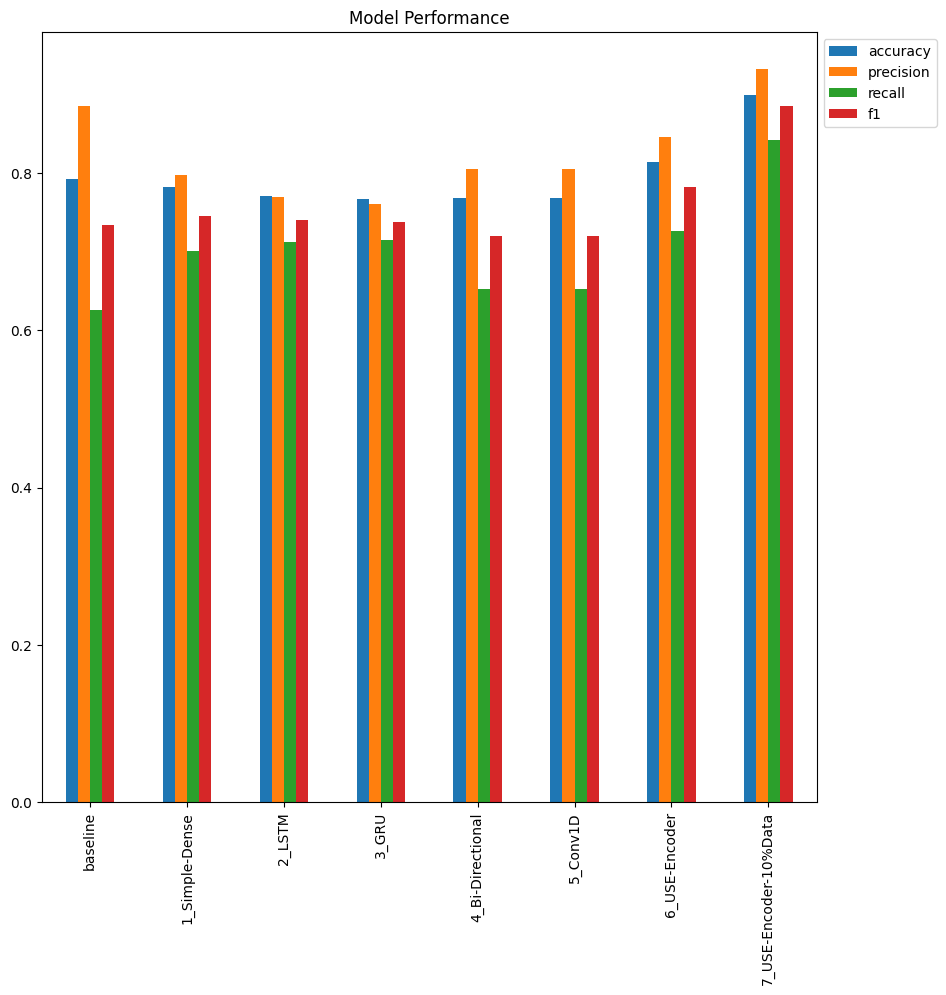

In [79]:
# Plot and compare all of our model results
import matplotlib.pyplot as plt
all_model_results.plot(kind="bar", figsize=(10,10), title="Model Performance").legend(bbox_to_anchor=(1.0, 1.0))
#

<Axes: title={'center': 'F1-Score'}>

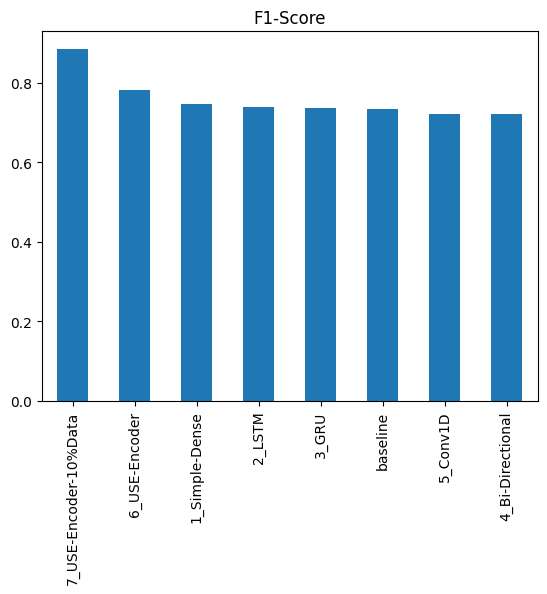

In [81]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", title="F1-Score")

## Finding Most Wrong Examples

Even our best model isn't perfect — it's useful to analyze the predictions it gets wrong.

This helps us:
- Understand patterns in mistakes
- Identify the examples it is *most* confident about but still predicts incorrectly

For example: a tweet that **should have a label of 0** (not a disaster), but the model predicts a probability of **0.98 (very close to 1)** — meaning it's *very confident*, yet *very wrong*.


In [91]:
# Create a DataFrame with validation sentences and best performing model predictions



val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_7_preds,
                       # making our predictions 1 dimensional
                       "pred_probs":tf.squeeze(model_7_pred_probs)})
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.000282
1,FedEx no longer to transport bioterror germs i...,0,0.0,0.011408
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,1.000000
3,@camilacabello97 Internally and externally scr...,1,1.0,0.983582
4,Radiation emergency #preparedness starts with ...,1,1.0,0.725621


In [92]:
# find most wrong predictions and sort by prediction porbabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_probs", ascending=False)
most_wrong.head(10)

,text,target,pred,pred_probs
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.994284
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.945112
700,@MasochisticMage + catastrophe! It caused peop...,0,1.0,0.927585
234,???? it was an accident http://t.co/Oia5fxi4gM,0,1.0,0.916940
695,A look at state actions a year after Ferguson'...,0,1.0,0.910816
591,The Prophet (peace be upon him) said 'Save you...,0,1.0,0.889642
515,@BizzleMahomie SCREAMING,0,1.0,0.888736
52,@likeavillasboas @rich_chandler Being' injury ...,0,1.0,0.829146
17,there's this person &amp; they reckon when you...,0,1.0,0.812685
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.800141


In [93]:
most_wrong.tail()

,text,target,pred,pred_probs
518,FedEx no longer to transport bioterror germs i...,1,0.0,0.017064
441,FedEx no longer to transport bioterror germs i...,1,0.0,0.013158
573,#hot Funtenna: hijacking computers to send da...,1,0.0,0.011939
338,I was on my way to Gary but all the Chicago en...,1,0.0,0.011019
38,Why are you deluged with low self-image? Take ...,1,0.0,0.004610


Lets remind ourselves of the target lables....

* `0` = not disaster
* `1` = disaster

In [98]:
# Check the false positives (Model predicted 1 When should've been 0)
for row in most_wrong[:-19].itertuples():
    _, text,target,pred, pred_prob = row
    print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 0, Pred: 1.0, Prob: 0.9942843914031982
Text:
Deaths 3 http://t.co/nApviyGKYK

---

Target: 0, Pred: 1.0, Prob: 0.9451117515563965
Text:
Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA

---

Target: 0, Pred: 1.0, Prob: 0.927585244178772
Text:
@MasochisticMage + catastrophe! It caused people to get reckless and the bottom line is that at least three of your friends will have +

---

Target: 0, Pred: 1.0, Prob: 0.9169402122497559
Text:
???? it was an accident http://t.co/Oia5fxi4gM

---

Target: 0, Pred: 1.0, Prob: 0.9108161926269531
Text:
A look at state actions a year after Ferguson's upheaval http://t.co/GZEkQWzijq

---

Target: 0, Pred: 1.0, Prob: 0.8896424174308777
Text:
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'

---

Target: 0, Pred: 1.0, Prob: 0.8887355327606201
Text:
@BizzleMahomie SCREAMING

---

Target: 0, Pred: 1.0, Prob: 0.8291460275

### Making Predictions on the test dataset

In [107]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
    # Convert the single string into a TensorFlow tensor before passing to predict
    pred_prob = tf.squeeze(model_7.predict(tf.constant([test_sample])))
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Pred: 0, Prob: 0.20879758894443512
Text:
I'm melting a bar of chocolate under my laptop at least this fucking HELLFIRE is good for something

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Pred: 0, Prob: 0.02054174244403839
Text:
'Sometimes I close my eyes and picture what this world would be like if it were engulfed in flames.' #Bot

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Pred: 1, Prob: 0.9964636564254761
Text:
The Rocky Fire burning in CA still threatening more than 7k buildings. Largest in state &amp; one of nearly 2 dozen burning now #9newsmornings

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Pred: 0, Prob: 0.04365023598074913
Text:
I used to really think Danger was gonna be a movie

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Pred: 1, Prob: 0.7250142097473145
Text:
@BBCNewsAsia State sponsored terrorism.

----

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Pred: 0, Prob: 0.0009357633534818888
Text:
Get blown up with a delicious flavor of #BlowVape a

## The Speed/Score Tradeoff

When choosing a model, it's important to consider both **accuracy** and **speed**, especially in real-time applications like tweet classification.

For example, if we're processing **thousands of tweets per hour**, a **slightly less accurate model that runs faster** may be more useful than a **highly accurate model that is too slow**.

This tradeoff matters when:
- Real-time predictions are needed
- You’re working with limited computational resources

In short: the best model isn't always the most accurate — it's the one that balances **performance and practicality**.


In [108]:
# Let's make a function to measure the time of prediction
import time

def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on the given samples.

  Args:
    model: A trained model capable of making predictions.
    samples: Input data to make predictions on.

  Returns:
    Tuple of (predictions, time_taken_in_seconds)
  """
  start_time = time.time()
  preds = model.predict(samples)
  end_time = time.time()

  total_time = end_time - start_time
  print(f"Model took {total_time:.4f} seconds to make predictions on {len(samples)} samples.")

  return preds, total_time


In [111]:
model_7_total_preds, model_7_total_time = pred_timer(model=model_7,
                                                     samples=val_sentences)


baseline_model_total_preds, baseline_model_total_time = pred_timer(model=model_0,
                                                                    samples=val_sentences)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model took 0.3733 seconds to make predictions on 762 samples.
Model took 0.0254 seconds to make predictions on 762 samples.


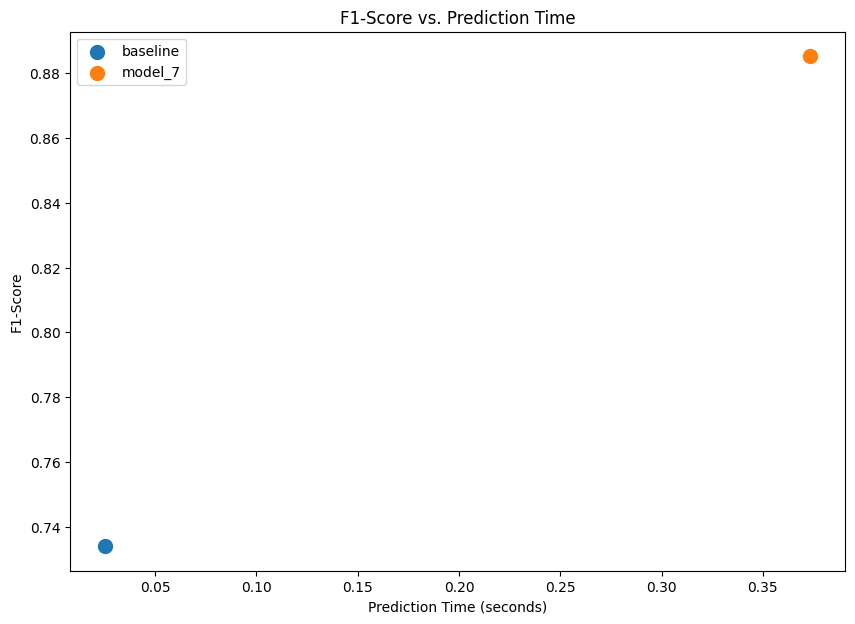

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_model_total_time, baseline_results["f1"], label="baseline", s=100)
plt.scatter(model_7_total_time, model_7_results["f1"], label="model_7", s=100)
plt.legend()
plt.title("F1-Score vs. Prediction Time")
plt.xlabel("Prediction Time (seconds)")
plt.ylabel("F1-Score")
plt.show()